# Retrieval and Preparation of California Solar Power Data

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import wget

matplotlib.rcParams['figure.figsize'] = [15, 10]
pd.options.display.max_columns = 999

## Load Data

Power output of 405 simulated photovoltaic (PV) power stations in California throughout 2016 at five minute intervals.

Source: <a href='https://www.nrel.gov/grid/solar-power-data.html'>National Renewable Energy Laboratory</a>

In [2]:
url = 'https://www.nrel.gov/grid/assets/downloads/ca-pv-2006.zip'
wget.download(url)

100% [......................................................................] 158130737 / 158130737

'ca-pv-2006.zip'

In [3]:
!unzip ca-pv-2006.zip -d solar

Archive:  ca-pv-2006.zip
  inflating: solar/Actual_32.55_-117.05_2006_DPV_13MW_5_Min.csv  
  inflating: solar/Actual_32.65_-115.15_2006_UPV_75MW_5_Min.csv  
  inflating: solar/Actual_32.65_-116.15_2006_UPV_50MW_5_Min.csv  
  inflating: solar/Actual_32.65_-116.85_2006_UPV_38MW_5_Min.csv  
  inflating: solar/Actual_32.65_-116.95_2006_DPV_12MW_5_Min.csv  
  inflating: solar/Actual_32.65_-117.05_2006_DPV_12MW_5_Min.csv  
  inflating: solar/Actual_32.65_-117.15_2006_DPV_11MW_5_Min.csv  
  inflating: solar/Actual_32.65_-117.25_2006_DPV_13MW_5_Min.csv  
  inflating: solar/Actual_32.75_-114.85_2006_UPV_150MW_5_Min.csv  
  inflating: solar/Actual_32.75_-115.45_2006_UPV_44MW_5_Min.csv  
  inflating: solar/Actual_32.75_-115.95_2006_UPV_59MW_5_Min.csv  
  inflating: solar/Actual_32.75_-116.95_2006_DPV_8MW_5_Min.csv  
  inflating: solar/Actual_32.75_-117.05_2006_DPV_8MW_5_Min.csv  
  inflating: solar/Actual_32.75_-117.15_2006_DPV_13MW_5_Min.csv  
  inflating: solar/Actual_32.75_-117.25_2006_DPV_13M

In [4]:
df = pd.DataFrame()

for i, file in enumerate(os.listdir('solar')):
    if str(file).startswith('Actual'):
        if i % 20 == 0:
            print(file)
        if len(df) == 0:
            df = pd.read_csv('solar/' + str(file), index_col='LocalTime', parse_dates=True)
            df.index.names = ['DateTime']
            df.columns = ['ts1']
        else:
            single_df = pd.read_csv('solar/' + str(file))
            name = 'ts%s' % str(df.shape[1] + 1)
            df[name] = single_df['Power(MW)'].values
            del(single_df)
print(df.shape)
df.head()

Actual_32.55_-117.05_2006_DPV_13MW_5_Min.csv
Actual_32.85_-117.05_2006_DPV_13MW_5_Min.csv
Actual_33.15_-117.25_2006_DPV_11MW_5_Min.csv
Actual_33.55_-117.25_2006_DPV_31MW_5_Min.csv
Actual_33.75_-116.45_2006_DPV_11MW_5_Min.csv
Actual_33.85_-117.35_2006_DPV_31MW_5_Min.csv
Actual_33.95_-117.35_2006_DPV_31MW_5_Min.csv
Actual_34.05_-117.45_2006_DPV_31MW_5_Min.csv
Actual_34.15_-117.75_2006_DPV_74MW_5_Min.csv
Actual_34.25_-118.35_2006_DPV_121MW_5_Min.csv
Actual_34.45_-117.75_2006_UPV_52MW_5_Min.csv
Actual_34.5_-118.15_2006_UPV_170MW_5_Min.csv
Actual_34.75_-116.25_2006_UPV_125MW_5_Min.csv
Actual_35.05_-117.65_2006_UPV_52MW_5_Min.csv
Actual_35.25_-117.95_2006_UPV_52MW_5_Min.csv
Actual_36.15_-120.15_2006_UPV_100MW_5_Min.csv
Actual_37.15_-121.75_2006_UPV_50MW_5_Min.csv
Actual_37.55_-122.35_2006_DPV_14MW_5_Min.csv
Actual_37.85_-122.25_2006_DPV_24MW_5_Min.csv
Actual_38.55_-121.15_2006_UPV_50MW_5_Min.csv
Actual_39.75_-121.85_2006_DPV_11MW_5_Min.csv
(105120, 405)


,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10,ts11,ts12,ts13,ts14,ts15,ts16,ts17,ts18,ts19,ts20,ts21,ts22,ts23,ts24,ts25,ts26,ts27,ts28,ts29,ts30,ts31,ts32,ts33,ts34,ts35,ts36,ts37,ts38,ts39,ts40,ts41,ts42,ts43,ts44,ts45,ts46,ts47,ts48,ts49,ts50,ts51,ts52,ts53,ts54,ts55,ts56,ts57,ts58,ts59,ts60,ts61,ts62,ts63,ts64,ts65,ts66,ts67,ts68,ts69,ts70,ts71,ts72,ts73,ts74,ts75,ts76,ts77,ts78,ts79,ts80,ts81,ts82,ts83,ts84,ts85,ts86,ts87,ts88,ts89,ts90,ts91,ts92,ts93,ts94,ts95,ts96,ts97,ts98,ts99,ts100,ts101,ts102,ts103,ts104,ts105,ts106,ts107,ts108,ts109,ts110,ts111,ts112,ts113,ts114,ts115,ts116,ts117,ts118,ts119,ts120,ts121,ts122,ts123,ts124,ts125,ts126,ts127,ts128,ts129,ts130,ts131,ts132,ts133,ts134,ts135,ts136,ts137,ts138,ts139,ts140,ts141,ts142,ts143,ts144,ts145,ts146,ts147,ts148,ts149,ts150,ts151,ts152,ts153,ts154,ts155,ts156,ts157,ts158,ts159,ts160,ts161,ts162,ts163,ts164,ts165,ts166,ts167,ts168,ts169,ts170,ts171,ts172,ts173,ts174,ts175,ts176,ts177,ts178,ts179,ts180,ts181,ts182,ts183,ts184,ts185,ts186,ts187,ts188,ts189,ts190,ts191,ts192,ts193,ts194,ts195,ts196,ts197,ts198,ts199,ts200,ts201,ts202,ts203,ts204,ts205,ts206,ts207,ts208,ts209,ts210,ts211,ts212,ts213,ts214,ts215,ts216,ts217,ts218,ts219,ts220,ts221,ts222,ts223,ts224,ts225,ts226,ts227,ts228,ts229,ts230,ts231,ts232,ts233,ts234,ts235,ts236,ts237,ts238,ts239,ts240,ts241,ts242,ts243,ts244,ts245,ts246,ts247,ts248,ts249,ts250,ts251,ts252,ts253,ts254,ts255,ts256,ts257,ts258,ts259,ts260,ts261,ts262,ts263,ts264,ts265,ts266,ts267,ts268,ts269,ts270,ts271,ts272,ts273,ts274,ts275,ts276,ts277,ts278,ts279,ts280,ts281,ts282,ts283,ts284,ts285,ts286,ts287,ts288,ts289,ts290,ts291,ts292,ts293,ts294,ts295,ts296,ts297,ts298,ts299,ts300,ts301,ts302,ts303,ts304,ts305,ts306,ts307,ts308,ts309,ts310,ts311,ts312,ts313,ts314,ts315,ts316,ts317,ts318,ts319,ts320,ts321,ts322,ts323,ts324,ts325,ts326,ts327,ts328,ts329,ts330,ts331,ts332,ts333,ts334,ts335,ts336,ts337,ts338,ts339,ts340,ts341,ts342,ts343,ts344,ts345,ts346,ts347,ts348,ts349,ts350,ts351,ts352,ts353,ts354,ts355,ts356,ts357,ts358,ts359,ts360,ts361,ts362,ts363,ts364,ts365,ts366,ts367,ts368,ts369,ts370,ts371,ts372,ts373,ts374,ts375,ts376,ts377,ts378,ts379,ts380,ts381,ts382,ts383,ts384,ts385,ts386,ts387,ts388,ts389,ts390,ts391,ts392,ts393,ts394,ts395,ts396,ts397,ts398,ts399,ts400,ts401,ts402,ts403,ts404,ts405
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
# No missing values
df.isnull().any().all() == False

True

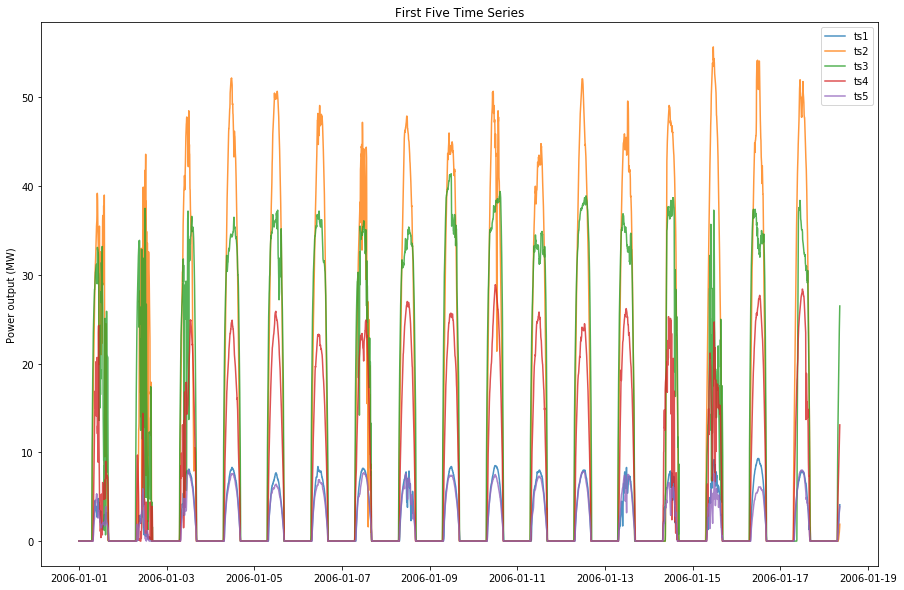

In [12]:
for col in df.columns[:5]:
    plt.plot(df.index[:5000], df[col][:5000], alpha=0.8, label=col)
plt.legend()
plt.title("First Five Time Series")
plt.ylabel("Power output (MW)");

## Save Data

In [7]:
!rm -rf solar
!rm ca-pv-2006.zip

In [8]:
df.to_csv('california-solar-power.csv')